In [1]:
import os,sys
import pathlib
sys.path.append(os.path.abspath('./practico2'))


# Conociendo el SDSS

- En el sigiente <a href='https://www.sdss3.org/dr9/algorithms/magnitudes.php'>Link</a> podemos encontrar informacion del SDSS relacionada con Mediciones de Flujo y Magnitud

## Model Magnitudes: devMag, expMag, modelMag

### Photometric Models in SDSS

SDSS applies two main models to fit the light profiles of extended objects:

- De Vaucouleurs Profile (devMag): This model is often used for elliptical galaxies and is characterized by a profile where the surface brightness decreases with the radius following a de Vaucouleurs law: $$ I(r) = I_0 exp{\left(-7.67\left( \frac{r}{re}\right)^{\frac{1}{4}}\right)} $$
    -  The profile is truncated beyond $7r_{e}$ and smoothed within $r_{e}/50$

- Exponential Profile (expMag): This model is used for spiral galaxies and features an exponential decrease in brightness with radius: $$I(r) = I_0 exp{\left(-1.68\left( \frac{r}{re}\right)\right)}$$ 
    - The profile is truncated beyond $3r_{e}$ and smoothly goes to zero at $4r_{e}$.

- modelMag, uses the better of the two fits in the r-band as a matched aperture to calculate the flux in all bands. For extended objects, modelMag usually provides the best available SDSS colors.

### Fitting Procedures

- Each model is fit independently to the image of the galaxy in each SDSS band (u, g, r, i, z). The fitting process involves:

    - Adjusting Model Parameters: Each model has adjustable parameters like the effective radius $r_{e}$ axis ratio, and position angle. These are determined for both the de Vaucouleurs and exponential models.

    - Convolution with PSF: The models are convolved with the Point Spread Function (PSF) to account for the effects of seeing and the instrument's resolution.

### Model Quantities and Magnitudes

- Quantities Derived:For each model, quantities like effective radius ($r_{deV}$,$r_{Exp}$), axis ratio ($ab_{deV}$, $ab_{Exp}$), position angle ($\phi_{deV}$. $\phi_{Exp}$) and likelihoods ($deVlnL$,$ExplnL$) are calculated.

- Magnitudes: The total magnitudes derived from these models are deVMag , expMag

### Calculation of ModelMag

- Selection Process: The ModelMag for a galaxy is determined by selecting the model (either de Vaucouleurs or exponential) with the higher likelihood in the r-band. This chosen model is then applied to all other bands, adjusting the amplitude while considering the PSF in each band.

- Aperture Matching: The flux is measured through equivalent apertures in all bands to ensure consistency.

- Purpose: ModelMag is designed to provide a more accurate measure of a galaxy's flux by using the best-fitting model, leading to more reliable galaxy colors.

### Comparison with Other Magnitudes

- PSF Magnitudes: For point sources (stars), PSF magnitudes are optimal. ModelMag serves as a good proxy for PSF magnitudes for point-like sources.

- Petrosian Magnitudes: For extended sources like galaxies, Petrosian magnitudes are often used, but they can be less precise due to aperture effects. ModelMag typically has a higher signal-to-noise ratio compared to Petrosian magnitudes for faint galaxies and better captures global galaxy colors.

## Guia de que magnitud usar

- En el SDSS existen un monton de Magnitudes que se pueden utilizar.<a href='https://www.sdss3.org/dr9/algorithms/magnitudes.php'>aca</a> hay una guia de que magnitudes es conveniente utilizar.

- Para realizar fotometria de las galaxias cercanas es conveniente usar las petroMag
    - Petrosian Magnitudes: These are designed to measure the flux of extended sources while being less sensitive to local variations in seeing. Petrosian magnitudes are calculated using a method that involves measuring flux within an aperture defined by a fraction of the local surface brightness. This method is effective for capturing a large fraction of the galaxy’s total flux and remains relatively consistent with redshift.

- Para el color de las galaxias utilizamos modelMag

    - Model Magnitudes: These are derived from the best-fit model (either de Vaucouleurs or exponential) in the r-band and are applied consistently across all bands. This approach ensures that the measurement of light is consistent through the same aperture in all filters, leading to more accurate color determination.

# AB Magnitude System

<a href='https://www.sdss3.org/dr8/algorithms/fluxcal.php#SDSStoAB'>Documentacion Oficial</a>

- The AB magnitude system (or AB system) is a standard photometric system used in many astronomical surveys. It was introduced to provide a consistent framework for comparing magnitudes across different filters and telescopes. The AB magnitude system is designed so that the flux in each band is directly comparable, and it ensures that the magnitude of an object corresponds to its flux density in a straightforward manner.

## Conversion from SDSS ugriz to AB Magnitudes

- To convert SDSS ugriz magnitudes to AB magnitudes, you need to apply specific zero-point offsets that account for the differences in the calibration systems between SDSS and the AB system. The conversion involves adding or subtracting a fixed amount from the SDSS magnitudes to align them with the AB system.

- Understand the Zero Points: The SDSS system and the AB system use different zero points for their magnitudes. The zero points are constants that adjust the raw magnitude measurements to a standard reference system. For SDSS, these zero points are defined relative to the SDSS photometric system, while the AB system uses a different reference.

- Apply the Conversion Offsets: To convert SDSS magnitudes to AB magnitudes, you add or subtract specific constants to the SDSS magnitudes. These constants are determined by comparing the zero points of the SDSS system with those of the AB system. The offsets for the SDSS ugriz filters are as follows:

    - u : substract -0.036
    - g : add 0.012
    - r : add 0.010
    - i : add 0.028
    - z : add 0.040


# Elaboracion del practico 2

## Problema 3

- primero elimine valores por fuera de los requerimientos:
    - Seleccionar la submuestra 14.5 ≤ r ≤ 17.77
    - Seleccionar la submuestra petroR50 > 1.5[arcsec]

- Seleccionar los siguientes elementos:
    - Galaxy.fracDeV_r : Sin unidades , Weight of deV component in deV+Exp model
    - SpecObj.velDisp : Unidades = [km/s], Velocity dispersion
    - Pasar al sistema AB : ab_Corr = np.array([-0.036,0.012,0.010,0.028,0.040])

- Para convertir petroR50 y petroR90 a kpc tal y como pide la guia debemos utilizar la formula: $$d=\frac{1[kpc]}{0.004848 \times \theta[arcsec]}$$ donde $\theta$ es el angulo en arcsec (Tal y como provee el catalogo).

- Hay que convertir todas las petroMag y todas las modelMag al sistema AB (Sumando y restando las constantes correspondientes a cada banda).

- El color no es mas que una resta de magnitudes petroMag y modelMag

- El indice de concentracion se define como: $$C=\frac{R_{90}}{R_{50}}$$ este valor en SDSS suele ser de C=2.5. Este indice se suele utilizar las galaxias de tipo temprano (las mas elipticas) de las de tipo tardio (las mas espiraladas) (Recordar que tambien esta es una denominacion de Hubble poco fortuita porque tal evolucion no existe)

# Practico 09/09/2024
- 1:25:00 : Se descubrio que la distribucion de los colores es bimodal. Uno le puede ajustar una doble gaussiana. En este momento hemos seleccionado galaxias sin ver el ambiente. Estas son galaxias que estan muy cerca.

- Nota: El grafico de histograma de modelMag_ur muestra mas galaxias de tipo azul (las que estan a la izquierda) y menos galaxias de tipo rojo (a la derecha)

- 1:26:50 : No hemos visto ambiente, la mayoria de estas galaxias deben ser de campo. Los tipos de galaxias no viven en cualquier lado. La mayoria de las galaixas rojas, elipticas viven en sistemas mas aglomerados (cumulos de galaxias)

- 1:27:22 : Entonces si estuviesemos analizando cumulos, la distribucion de galaxias [que veriamos en el histograma] tendria predominancia roja.

- 1:35:00 : Ajuste de la doble gaussiana - Usar scipy

# Practico 2 
## Pasos

1) Corregi por extincion TODAS las bandas en el df.

In [2]:
import functions_p2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
path_table = os.path.abspath('./practico2/table3.csv')
df = functions_p2.process_table(path_table=path_table)

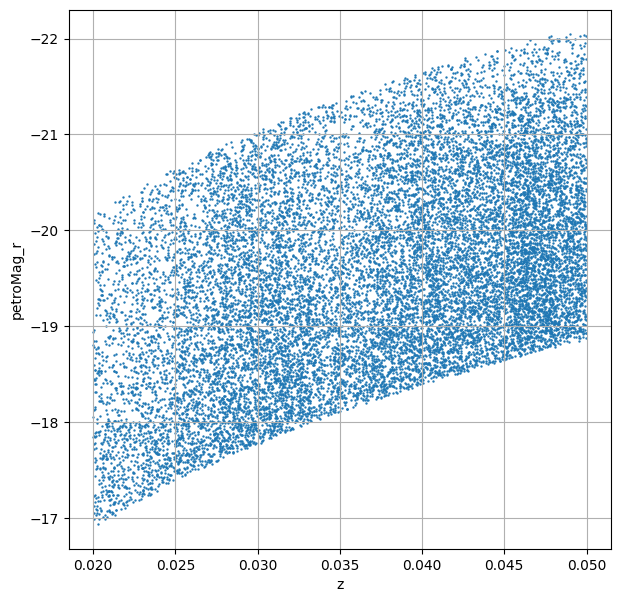

In [4]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.scatter(df['redshift'],df['petroMag_r'],s=0.5)
ax.set_xlabel('z')
ax.set_ylabel('petroMag_r')
plt.gca().invert_yaxis()
ax.grid()
fig.show()

Observaciones del grafico anterior muestran que la muestra esta cada vez mas incompleta para magnitudes mas tenues en regiones de redshift cada vez mas grande (zona inferior derecha).

Tener en cuenta que lo que estoy observando son magnitudes absolutas (fijarse el codigo donde a la magnitud aparente se la transforma en magnitud absoluta)

A redshift cercano veo objetos con magnitud absoluta algo superior a -20, porque basicamente esos son los objetos que hay cerca. A medida que miro mas lejos hay mas variedad de objetos, pero perdi los mas debiles en magnitud.

Una de las preguntas es, que paso si trabajo con esta muestra? Pues a alto redshift obtengo un sesgo donde al hacer estadistica tendre mayor peso de los objetos mas brillantes.

Para evitar esto, uno intenta realizar una muestra completa en flujo/magnitud y volumen. En nuestro caso esto se logra cortando el espectro obtenido de manera que obtenga una franja de objetos uniforme con los que voy a trabajar.


In [4]:
# ur = df[(df['modelMag_ur'] < 1) &(df['modelMag_ur']>0.1)]
df2 = df[(df['modelMag_gr']>0) & (df['modelMag_gr']<1.5)]
df3 = df[(df['modelMag_ur'] < 4) &(df['modelMag_ur']>0.5)]

<Axes: xlabel='modelMag_ur', ylabel='Count'>

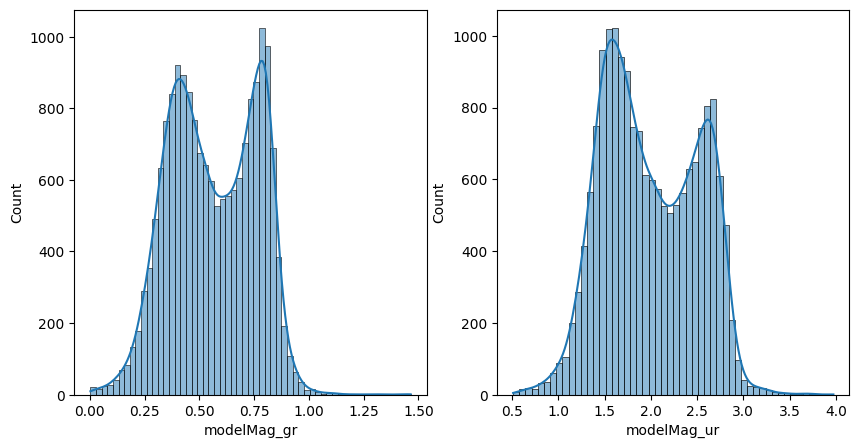

In [5]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df2['modelMag_gr'], ax=ax[0],kde=True)
sns.histplot(df3['modelMag_ur'], ax=ax[1],kde=True)

Este cuadro lo que muestra son las separaciones entre los colores. Concretamente lo que uno ve son dos gaussianas superpuestas indicando una poblacion bi-modal en los colores. En el caso de ur lo que tenemos es una distribucion de una poblacion de galaxias azules y la otra una poblacion de galaxias rojas.

### Ajuste de la doble Gaussiana


$ f(x)=A_{1} exp\left(-\frac{(x-\mu_{1})^{2}}{2\sigma_{1}^{2}}\right) + f(x)=A_{2} exp\left(-\frac{(x-\mu_{2})^{2}}{2\sigma_{2}^{2}}\right)$

In [6]:
import numpy as np
from scipy.optimize import curve_fit


In [7]:
# Defino la doble gaussiana:
def double_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
    return (A1 * np.exp((- (x - mu1)**2) / (2 * sigma1**2)) +
            A2 * np.exp((- (x - mu2)**2)/ (2 * sigma2**2)))

In [8]:
initial_guess = [355, 1.5, 0.4, 280, 2.5, 0.2]
# Como x e y necesito el valor medio de los bins
# 1) Haga el histograma en numpy
counts,bins = np.histogram(df3['modelMag_ur'],bins=150)
# 2) Get the mids of bins
bin_mids = (bins[:-1] + bins[1:]) / 2

Text(0, 0.5, 'modelMag_ur')

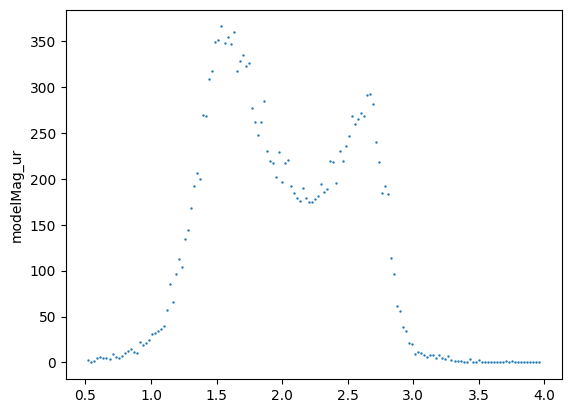

In [14]:
plt.scatter(bin_mids,counts,s=0.5)
plt.ylabel('modelMag_ur')

In [10]:
#Ahora haremos el ajuste
popt, pcov = curve_fit(double_gaussian, bin_mids, counts, p0=initial_guess)

# Extracting the optimal parameters
A1, mu1, sigma1, A2, mu2, sigma2 = popt

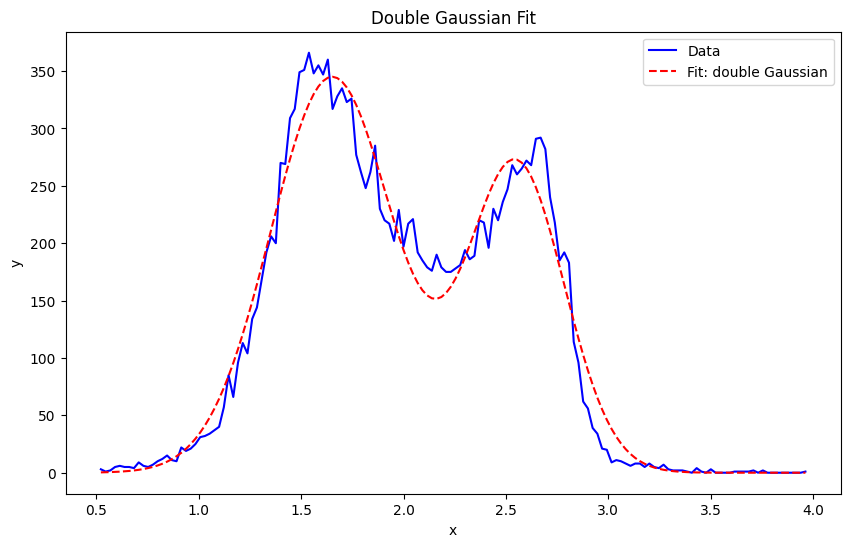

In [11]:
# Plot the data and the fit
plt.figure(figsize=(10, 6))
plt.plot(bin_mids, counts, 'b-', label='Data')
plt.plot(bin_mids, double_gaussian(bin_mids, *popt), 'r--', label='Fit: double Gaussian')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Double Gaussian Fit')
plt.legend()
plt.show()

## C_index y fracDeV

## Concentration index
In the SDSS (Sloan Digital Sky Survey), the concentration index is a measure of a galaxy's light distribution, specifically how concentrated the light is towards its center. It is defined as the ratio of the radius containing 75% of the galaxy's light to the radius containing 25% of the light, based on the de Vaucouleurs profile. A higher concentration index indicates a more centrally concentrated light distribution, which often corresponds to a more bulge-dominated galaxy. This index helps in understanding the structure and evolution of galaxies.

- El indice de concentracion es una medida de la distribucion de luz en una galaxia. Concretemente que tan concentrada esta la luz hacia su centro.
- Se define como el cociente entre el radio que contiene el 75% de la luz contra el radio que contiene el 25%, en cuanto a la distribucion de brillo del perfil de deVau..
- Como el indice es un cociente entre el radio con mayor concentracion de luz y el radio con una menor concentracion de luz, entonces es de esperar que siempre se cumpla que R_75% > R_25% entonces tiene sentido que c > 1.

- Un mayor indice, significa que hay una mayor concentracion de luz R_75% >> R_25%

In [153]:
df2['c_index'].describe()

count    18042.000000
mean         2.485771
std          0.402651
min          1.148692
25%          2.189251
50%          2.428200
75%          2.739816
max         11.874727
Name: c_index, dtype: float64

In [154]:
c_index = np.array(df2['c_index'])
c_index = c_index[np.where(c_index < 4)]

<Axes: xlabel='fracDeV_r', ylabel='Count'>

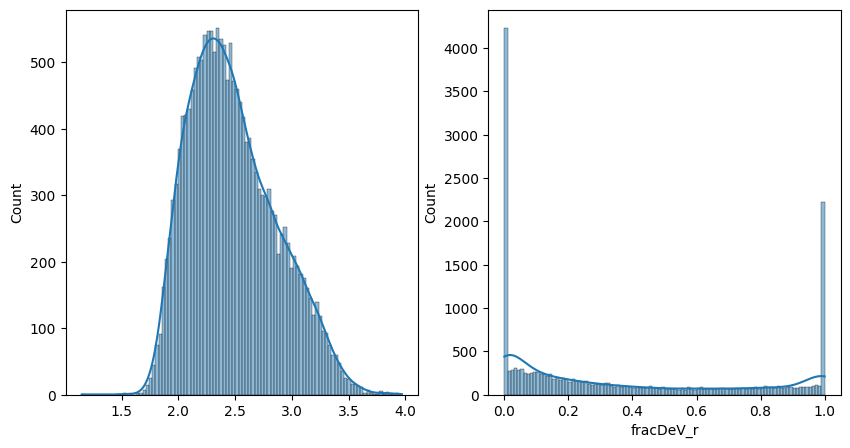

In [158]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(c_index, ax=ax[0],kde=True,bins=100)
sns.histplot(df3['fracDeV_r'], ax=ax[1],kde=True,bins=100)

- El grafico del indice de concentracion muestra una especie de bimodalidad. Hay un gran cantidad de galaxias con un indice de concentracion de 2.2 o 2.1 , que serian mas galaxias espirales.

- Despues hay una menor concentracion de elementos que tienen centro en masomenos 3.0, esas son galaxias elipticas. Y diriamos que hay menor cantidad.

### Sobre fracdev
- Definicion: fracdev is a photometric parameter providing the weight of a de Vaucouleurs component
in the best composite exponential + de Vaucouleurs models.

- Primero hay que entender que el perfil de de V hace referencia a la distribucion de luz de una galaxia eliptica. De wikipedia tenemos: La ley de De Vaucouleurs (también denominada perfil de De Vaucouleurs) describe cómo la brillantez de la superficie I de una galaxia elíptica varía en función de la distancia aparente R desde el centro.

- Este perfil se expresa como la formula: $I(r)=exp(-k (\frac{r}{r_{e}})^{1/4})$ donde $r_{e}$ es un radio conteniendo la mitad de la luz de la galaxia.

- entre mas cerca e 1 sea fracdev, mas eliptica es la galaxia. O mas bien, mas componente de Vauculerurs tiene la galaxia. Entre mas cerca a 0, menos tiene de este componente y por lo tanto seria menos eliptica.

- Con lo dos diagramas anteriores, yo diria que hay una mayor poblacion de galaxias no elipticas.

In [157]:
df2['fracDeV_r'].describe()

count    18042.000000
mean         0.365374
std          0.372054
min          0.000000
25%          0.019677
50%          0.214748
75%          0.713782
max          1.000000
Name: fracDeV_r, dtype: float64

# Correlacion entre C y u-r

In [160]:
df3[['c_index','modelMag_ur']].corr()

,c_index,modelMag_ur
c_index,1.00000,0.52654
modelMag_ur,0.52654,1.00000


<Axes: xlabel='modelMag_r', ylabel='modelMag_ur'>

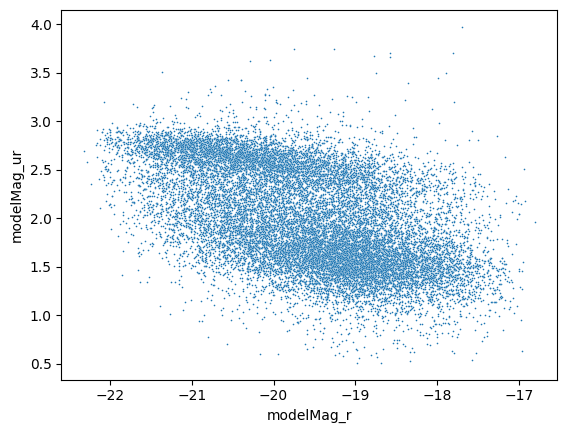

In [12]:
# Diagrama color magnitud

sns.scatterplot(data=df3,x='modelMag_r',y='modelMag_ur',markers='.',s=1.5)
# plt.scatter(df3['modelMag_r'],df3['modelMag_ur'],s=0.4)

In [110]:
def double_gaussian(x, A1, mu1, sigma1, A2, mu2, sigma2):
    return (A1 * np.exp((- (x - mu1)**2) / (2 * sigma1**2)) +
            A2 * np.exp((- (x - mu2)**2)/ (2 * sigma2**2)))

def fitter(x,initial_guess,bins):
	counts,bins = np.histogram(x,bins=bins)
	bin_mids = (bins[:-1] + bins[1:]) / 2
	popt, pcov = curve_fit(double_gaussian, bin_mids, counts, p0=initial_guess)
	# Extracting the optimal parameters
	A1, mu1, sigma1, A2, mu2, sigma2 = popt
	# return {'A1':A1,'mu1':mu1,'sigma1':sigma1,'A2':A2,'mu2':mu2,'sigma2':sigma2}
	return {'popt':popt,'bin_mids':bin_mids,'counts':counts}

In [75]:
# Busco los quintiles
decimals = 1
quantiles = [
    round(df3['modelMag_r'].quantile(q=0.2),decimals),
    round(df3['modelMag_r'].quantile(q=0.4),decimals),
    round(df3['modelMag_r'].quantile(q=0.6),decimals),
    round(df3['modelMag_r'].quantile(q=0.8),decimals)
    ]
quantiles

[-20.5, -19.8, -19.3, -18.7]

In [91]:
df3_r = df3[['modelMag_r','modelMag_ur']].round(decimals)
df_0 = df3_r[df3_r['modelMag_r']==quantiles[0]]
df_1 = df3_r[df3_r['modelMag_r']==quantiles[1]]
df_2 = df3_r[df3_r['modelMag_r']==quantiles[2]]
df_3 = df3_r[df3_r['modelMag_r']==quantiles[3]]


<Axes: xlabel='modelMag_ur', ylabel='Count'>

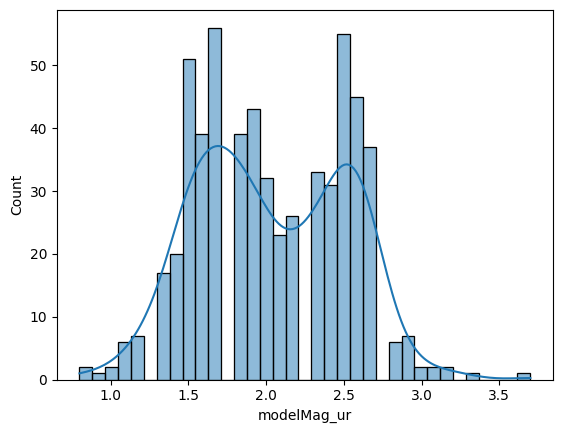

In [132]:
sns.histplot(df_1['modelMag_ur'],bins=35,kde=True)

In [133]:
fit_0 = fitter(x=df_0['modelMag_ur'],initial_guess=[25,1.9,0.4,42,2.7,0.2],bins=25)
fit_1 = fitter(x=df_1['modelMag_ur'],initial_guess=[36,1.7,0.4,33,2.5,0.2],bins=35)
fit_2 = fitter(x=df_2['modelMag_ur'],initial_guess=[90,1.7,0.4,40,2.5,0.2],bins=25)
fit_3 = fitter(x=df_3['modelMag_ur'],initial_guess=[70,1.5,0.4,20,2.5,0.1],bins=25)

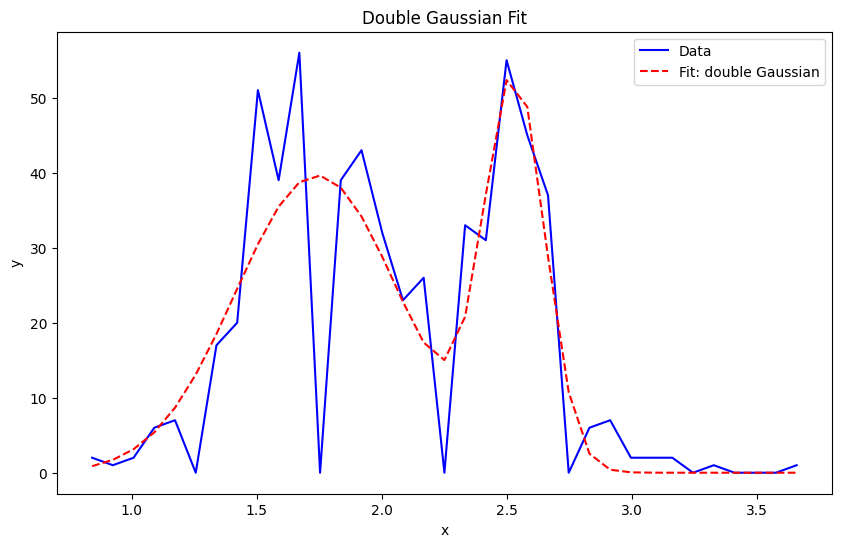

In [134]:
fits = [fit_0,fit_1,fit_2,fit_3]
ft = fits[1]
plt.figure(figsize=(10, 6))
plt.plot(ft['bin_mids'], ft['counts'], 'b-', label='Data')
plt.plot(ft['bin_mids'], double_gaussian(ft['bin_mids'], *ft['popt']), 'r--', label='Fit: double Gaussian')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Double Gaussian Fit')
plt.legend()
plt.show()

# Grafico con los cuartiles


In [136]:
##A1, mu1, sigma1, A2, mu2, sigma2 = popt
x = [quantiles[i] for i in range(4)]
y1 = [f['popt'][1] for f in fits]
y4 = [f['popt'][4] for f in fits]

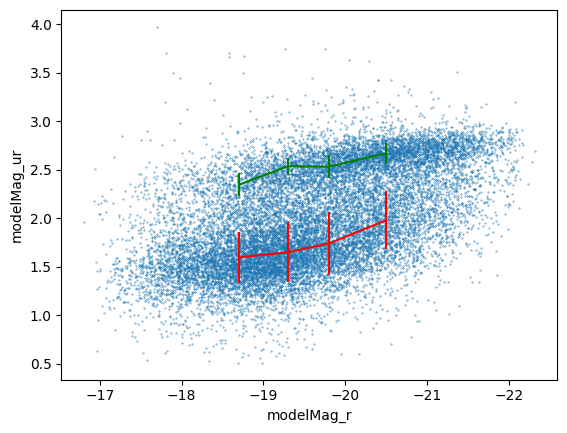

In [167]:
fig,ax = plt.subplots()
ax.scatter(df3['modelMag_r'],df3['modelMag_ur'],s=0.1)
#quartil 0
# ax.scatter(quantiles[0],fit_0['popt'][1],c='red')
ax.errorbar(quantiles[0],fit_0['popt'][1],yerr=fit_0['popt'][2],c='red')
# ax.scatter(quantiles[0],fit_0['popt'][4],c='red')
ax.errorbar(quantiles[0],fit_0['popt'][4],yerr=fit_0['popt'][5],c='green')
#quartil 1
# ax.scatter(quantiles[1],fit_1['popt'][1],c='red')
ax.errorbar(quantiles[1],fit_1['popt'][1],yerr=fit_1['popt'][2],c='red')
# ax.scatter(quantiles[1],fit_1['popt'][4],c='red')
ax.errorbar(quantiles[1],fit_1['popt'][4],yerr=fit_1['popt'][5],c='green')
#quartil 2
# ax.scatter(quantiles[2],fit_2['popt'][1],c='red')
ax.errorbar(quantiles[2],fit_2['popt'][1],yerr=fit_2['popt'][2],c='red')
# ax.scatter(quantiles[2],fit_2['popt'][4],c='red')
ax.errorbar(quantiles[2],fit_2['popt'][4],yerr=fit_2['popt'][5],c='green')
#quartil 3
# ax.scatter(quantiles[3],fit_3['popt'][1],c='red')
ax.errorbar(quantiles[3],fit_3['popt'][1],yerr=fit_3['popt'][2],c='red')
# ax.scatter(quantiles[3],fit_3['popt'][4],c='red')
ax.errorbar(quantiles[3],fit_3['popt'][4],yerr=fit_3['popt'][5],c='green')
ax.plot(x,y1,c='red')
ax.plot(x,y4,c='green')
ax.set_xlabel('modelMag_r')
ax.set_ylabel('modelMag_ur')
plt.gca().invert_xaxis()

# Relacion Tamanio luminosidad

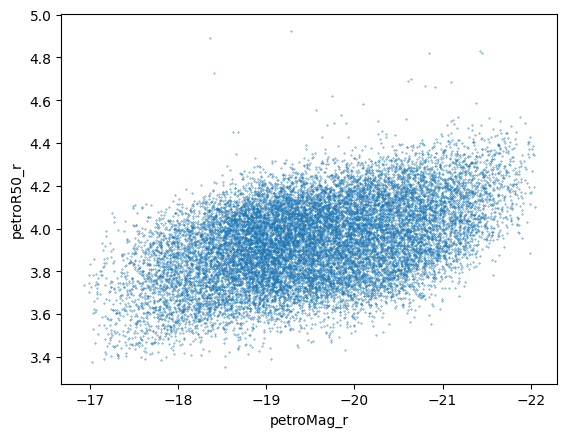

In [168]:
plt.scatter(df['petroMag_r'], np.log10(df['petroR50_r']),s=0.1)
plt.xlabel('petroMag_r')
plt.ylabel('petroR50_r')
plt.gca().invert_xaxis()
